6.
В приложенном файле — данные по ежемесячному уровню производства молока в фунтах на одну корову:

monthly-milk-production.csv

Загрузите ряд, создайте новый ряд значений среднего дневного уровня производства молока в фунтах на одну корову, поделив на число дней в месяце (вычисляется с помощью функции monthrange из пакета calendar). Постройте график полученного ряда; какой из приведённых ниже графиков у вас получился?

In [1]:
import pandas as pd
import calendar
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
milk = pd.read_csv('monthly-milk-production.csv',';', index_col=['month'], parse_dates=['month'], dayfirst=True)

In [3]:
def new_milk(year, month, milk):
    _, days = calendar.monthrange(year, month)
    return milk / days

In [4]:
milk['daily'] = list(map(new_milk, milk.index.year, milk.index.month, milk.milk))

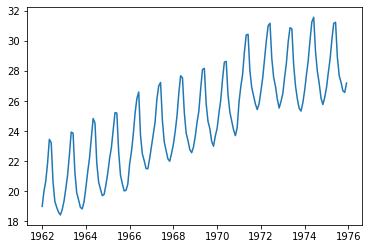

In [5]:
plt.plot(milk.daily);

7.
Для ряда со средним дневным количеством молока на корову из предыдущего вопроса давайте с помощью критерия Дики-Фуллера подберём порядок дифференцирования, при котором ряд становится стационарным. 

Дифференцирование можно делать так:

#### milk.daily_diff1 = milk.daily - milk.daily.shift(1)

Чтобы сделать сезонное дифференцирование, нужно изменить значение параметра у функции shift:

#### milk.daily_diff12 = milk.daily - milk.daily.shift(12)

При дифференцировании длина ряда сокращается, поэтому в части строк в новой колонке значения будут не определены (NaN). Подавая полученные столбцы на вход критерию Дики-Фуллера, отрезайте неопределённые значения, иначе вы получите неопределённый достигаемый уровень значимости. 

Итак, какое дифференцирование делает ряд стационарным?

In [6]:
def diki_fuller(data):
    _, p_value, _, _, _, _ = sm.tsa.stattools.adfuller(data)
    return p_value

Сначала проверим ряд средних дневных показателей

In [7]:
print(diki_fuller(milk.daily))

0.6822151513081407


Далее начинаем дифференцировать

однократное дифференцирование

In [8]:
milk['daily_diff1'] = milk.daily - milk.daily.shift(1)

In [9]:
print(diki_fuller(milk.daily_diff1.dropna()))

0.06430054654174562


Сезонное дифференцирование

In [10]:
milk['daily_diff12'] = milk.daily - milk.daily.shift(12)

print(diki_fuller(milk.daily_diff12.dropna()))

0.221276726588304


Сезонное + обычное дифференцирование

In [11]:
milk['daily_diff2'] = milk.daily_diff12.dropna() - milk.daily_diff12.dropna().shift(1)

In [12]:
print(diki_fuller(milk.daily_diff2.dropna()))

2.2808455518036712e-06


8.
Для стационарного ряда из предыдущего вопроса (продифференцированного столько раз, сколько вы посчитали нужным) постройте график автокорреляционной функции. Это можно cделать так:

#### import statsmodels.api as sm

#### sm.graphics.tsa.plot_acf(ряд.values.squeeze(), lags=50)

Исходя из этого графика, какое начальное приближение вы предложили бы для параметра $Q$ в модели SARIMA?

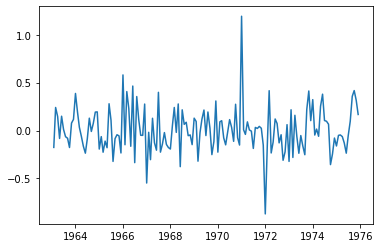

In [13]:
plt.plot(milk.daily_diff2.dropna())

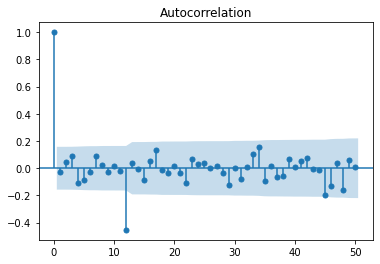

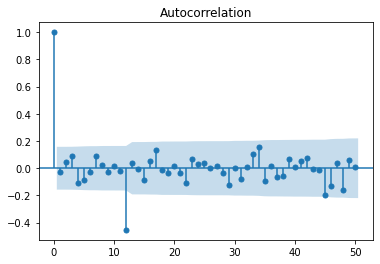

In [17]:
sm.graphics.tsa.plot_acf(milk.daily_diff2.dropna().values.squeeze(), lags=50)

9.
Для того же ряда, что и в предыдущем вопросе, постройте график частичной автокорреляционной функции. Это можно сделать так:

#### import statsmodels.api as sm
#### sm.graphics.tsa.plot_pacf(ряд.values.squeeze(), lags=50)

Исходя из этого графика, какое начальное приближение вы предложили бы для параметра $p$ в модели SARIMA?

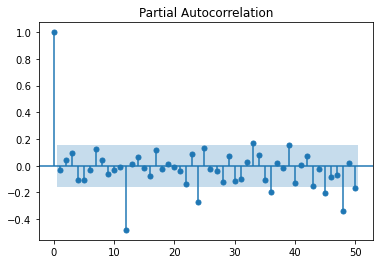

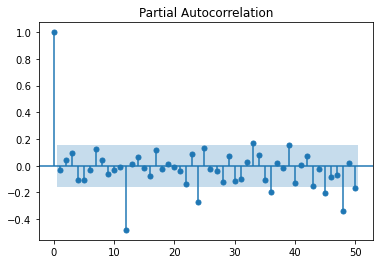

In [18]:
sm.graphics.tsa.plot_pacf(milk.daily_diff2.dropna().values.squeeze(), lags=50)